<a href="https://colab.research.google.com/github/raamiiChu/111-1_NCCU_DCT_3D_Game_Programming_G2/blob/main/%E6%B8%AC%E8%A9%A6%E7%94%A8/%E5%8C%AF%E5%85%A5%E8%B3%87%E6%96%99%E5%BA%AB_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 下載模組

In [ ]:
!pip install speechbrain
!pip install datasets

     |████████████████████████████████| 408 kB 4.5 MB/s 
     |████████████████████████████████| 1.2 MB 43.4 MB/s 
     |████████████████████████████████| 84 kB 3.0 MB/s 
     |████████████████████████████████| 596 kB 50.8 MB/s 
     |████████████████████████████████| 109 kB 46.4 MB/s 
     |████████████████████████████████| 546 kB 34.2 MB/s 
  Created wheel for hyperpyyaml: filename=HyperPyYAML-1.0.1-py3-none-any.whl size=15192 sha256=8f6c058e4493fe41be7366ab119e97e15d67553eb3afe8bee3eba915fe7e76f2
  Stored in directory: /root/.cache/pip/wheels/6c/87/65/266d722c3932f81f16332ce842e972be8421e3a9cd3771766b
Successfully built hyperpyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 342 kB 4.9 MB/s 
     |████████████████████████████████| 136 kB 62.3 MB/s 
     |████████████████████████████████| 212 kB 63.0 MB/s 
     |█████████████████████████████

## 匯入模組

In [ ]:
import torchaudio
import numpy as np
import pandas as pd

from speechbrain.pretrained import EncoderClassifier
from datasets import concatenate_datasets, load_dataset

## 主程式

#### 下載資料

來源：[Hugging Face common_voice datasets](https://huggingface.co/datasets/common_voice) \
官方網站：[common voice](https://commonvoice.mozilla.org/zh-TW/datasets)

`load_dataset("common_voice", 語言代碼, split=資料類型)` \
語言代碼去看 [各語言資料詳細數量.xlsx](https://docs.google.com/spreadsheets/d/15dNEyjlNJiYgRrZm16PmDbW_w7u1Z0fT/edit?usp=sharing&ouid=110248902447125902030&rtpof=true&sd=true)

In [ ]:
# 語言(改這邊就可以去查看其他語言了)
load_lang = ["zh-TW", "ar", "ja"]  # 讀檔案用的

In [ ]:
train_dataset = [load_dataset("common_voice", lang, split="train") for lang in load_lang]
train_dataset = concatenate_datasets(train_dataset)  # 把資料結合在一起

test_dataset = [load_dataset("common_voice", lang, split="test") for lang in load_lang]
test_dataset = concatenate_datasets(test_dataset)

valid_dataset = [load_dataset("common_voice", lang, split="validation") for lang in load_lang]
valid_dataset = concatenate_datasets(valid_dataset)

Generating train split:   0%|          | 0/3507 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2895 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2895 [00:00<?, ? examples/s]

Generating other split:   0%|          | 0/22477 [00:00<?, ? examples/s]

Generating validated split:   0%|          | 0/61232 [00:00<?, ? examples/s]

Generating invalidated split:   0%|          | 0/3584 [00:00<?, ? examples/s]

Dataset common_voice downloaded and prepared to /root/.cache/huggingface/datasets/common_voice/zh-TW/6.1.0/a1dc74461f6c839bfe1e8cf1262fd4cf24297e3fbd4087a711bd090779023a5e. Subsequent calls will reuse this data.


Generating train split:   0%|          | 0/14227 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7622 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/7517 [00:00<?, ? examples/s]

Generating other split:   0%|          | 0/18283 [00:00<?, ? examples/s]

Generating validated split:   0%|          | 0/43291 [00:00<?, ? examples/s]

Generating invalidated split:   0%|          | 0/6333 [00:00<?, ? examples/s]

Dataset common_voice downloaded and prepared to /root/.cache/huggingface/datasets/common_voice/ar/6.1.0/a1dc74461f6c839bfe1e8cf1262fd4cf24297e3fbd4087a711bd090779023a5e. Subsequent calls will reuse this data.


Generating train split:   0%|          | 0/722 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/632 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/586 [00:00<?, ? examples/s]

Generating other split:   0%|          | 0/885 [00:00<?, ? examples/s]

Generating validated split:   0%|          | 0/3072 [00:00<?, ? examples/s]

Generating invalidated split:   0%|          | 0/504 [00:00<?, ? examples/s]

Dataset common_voice downloaded and prepared to /root/.cache/huggingface/datasets/common_voice/ja/6.1.0/a1dc74461f6c839bfe1e8cf1262fd4cf24297e3fbd4087a711bd090779023a5e. Subsequent calls will reuse this data.


Reusing dataset common_voice (/root/.cache/huggingface/datasets/common_voice/zh-TW/6.1.0/a1dc74461f6c839bfe1e8cf1262fd4cf24297e3fbd4087a711bd090779023a5e)
Reusing dataset common_voice (/root/.cache/huggingface/datasets/common_voice/ar/6.1.0/a1dc74461f6c839bfe1e8cf1262fd4cf24297e3fbd4087a711bd090779023a5e)
Reusing dataset common_voice (/root/.cache/huggingface/datasets/common_voice/ja/6.1.0/a1dc74461f6c839bfe1e8cf1262fd4cf24297e3fbd4087a711bd090779023a5e)
Reusing dataset common_voice (/root/.cache/huggingface/datasets/common_voice/zh-TW/6.1.0/a1dc74461f6c839bfe1e8cf1262fd4cf24297e3fbd4087a711bd090779023a5e)
Reusing dataset common_voice (/root/.cache/huggingface/datasets/common_voice/ar/6.1.0/a1dc74461f6c839bfe1e8cf1262fd4cf24297e3fbd4087a711bd090779023a5e)
Reusing dataset common_voice (/root/.cache/huggingface/datasets/common_voice/ja/6.1.0/a1dc74461f6c839bfe1e8cf1262fd4cf24297e3fbd4087a711bd090779023a5e)


來源：https://huggingface.co/TalTechNLP/voxlingua107-epaca-tdnn

In [ ]:
language_id = EncoderClassifier.from_hparams(source="TalTechNLP/voxlingua107-epaca-tdnn", savedir="tmp")

/usr/local/lib/python3.7/dist-packages/huggingface_hub/utils/_deprecation.py:43: FutureWarning: Pass library_name=False as keyword args. From version 0.7 passing these as positional arguments will result in an error
  FutureWarning,


Downloading:   0%|          | 0.00/1.43k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/84.5M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/110k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.22k [00:00<?, ?B/s]

該模型可以用來將語音檔案轉換成數字 \

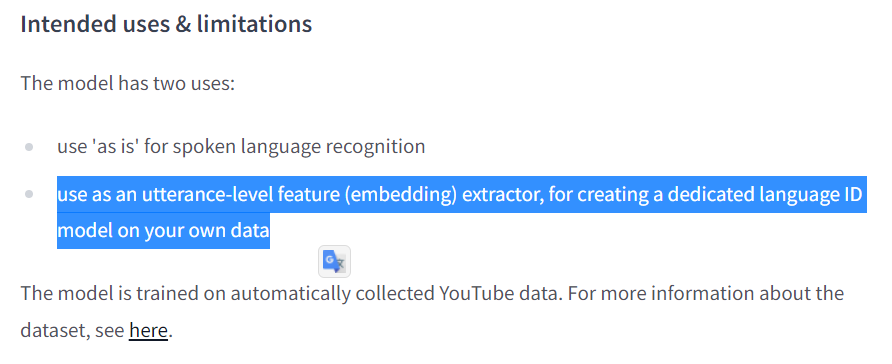

#### 中文

In [ ]:
file_name = train_dataset["path"][1]
signal = language_id.load_audio(file_name)
prediction =  language_id.classify_batch(signal)
prediction[0]

tensor([[0.3312, 0.3490, 0.4662, 0.3920, 0.3348, 0.3221, 0.3842, 0.3456, 0.4113,
         0.3889, 0.4374, 0.3733, 0.3812, 0.3372, 0.2977, 0.4379, 0.4433, 0.4347,
         0.4194, 0.3817, 0.4078, 0.4087, 0.2928, 0.3306, 0.3681, 0.4033, 0.4030,
         0.3626, 0.3417, 0.2751, 0.2374, 0.2647, 0.5075, 0.4288, 0.5043, 0.3954,
         0.4003, 0.3963, 0.4479, 0.4107, 0.3812, 0.3743, 0.3907, 0.3239, 0.3912,
         0.4011, 0.4335, 0.4344, 0.4484, 0.3787, 0.3656, 0.3514, 0.4047, 0.3850,
         0.3181, 0.3338, 0.3437, 0.4105, 0.3854, 0.4853, 0.4102, 0.3499, 0.5197,
         0.3848, 0.3518, 0.3746, 0.4496, 0.3497, 0.4140, 0.4136, 0.3414, 0.2289,
         0.3390, 0.5263, 0.3663, 0.3565, 0.3822, 0.3838, 0.3629, 0.3758, 0.4280,
         0.3471, 0.5328, 0.3796, 0.4354, 0.4087, 0.3461, 0.3607, 0.4208, 0.4089,
         0.3313, 0.2815, 0.3538, 0.3801, 0.4178, 0.3675, 0.3382, 0.3966, 0.4042,
         0.3264, 0.3615, 0.4107, 0.3675, 0.3895, 0.3407, 0.3673, 0.6937]])

In [ ]:
train_dataset["sentence"][1]

'在人生有重大轉折之際'

In [ ]:
prediction[3]

['zh']

In [ ]:
emb =  language_id.encode_batch(signal)
emb

tensor([[[-2.4104,  2.6575,  0.5842,  1.0798, -0.7516,  1.1696,  1.9774,
          -1.9764, -0.0714, -4.6060,  0.3472,  0.5491, -5.4857,  2.4192,
          -1.4819,  0.3146, -3.1142, -0.3238,  4.9721, -2.2221, -1.1847,
           0.9621, -0.0551,  2.9138,  0.6925, -4.6852, -1.7772, -0.3244,
           1.0176,  2.1629,  2.8294, -0.3844, -1.1540,  2.6886,  0.3911,
           1.9479, -0.9391,  1.1322,  0.1023, -0.3858, -1.4036,  1.7018,
           1.7363, -2.0970, -3.1697, -0.9825,  1.0310, -0.3618,  2.1922,
           2.3311, -2.4532,  0.8384,  2.0593,  1.1939,  3.1756,  0.3659,
          -1.0778,  3.1407, -2.2497, -1.4443, -2.5485,  2.7379,  1.7585,
          -3.4150, -0.3136,  2.9819, -0.0152,  0.4579,  2.0958,  3.5051,
           1.0935, -1.8398,  0.5766, -2.5514, -2.1561,  2.6388,  0.8696,
          -0.3679,  0.2958,  2.5880,  1.8385,  3.0765, -1.2263, -1.3463,
           2.3578,  2.2382, -0.1309, -1.5293,  0.5088, -0.6463, -2.2359,
          -1.5838, -1.4349, -3.0918,  1.6668,  1.02

#### 阿文

In [ ]:
file_name = train_dataset["path"][8000]
signal = language_id.load_audio(file_name)
prediction =  language_id.classify_batch(signal)
prediction[0]

tensor([[0.1725, 0.2452, 0.2463, 0.6029, 0.2531, 0.2280, 0.2872, 0.3152, 0.2356,
         0.1614, 0.2569, 0.2302, 0.3056, 0.2086, 0.3930, 0.1883, 0.2071, 0.2032,
         0.2713, 0.1851, 0.2845, 0.3532, 0.3005, 0.1553, 0.1548, 0.2615, 0.3591,
         0.2434, 0.2171, 0.2291, 0.2139, 0.1379, 0.2489, 0.2319, 0.1422, 0.2086,
         0.2429, 0.2608, 0.2371, 0.1572, 0.2793, 0.2237, 0.1913, 0.2094, 0.2647,
         0.2696, 0.2821, 0.1792, 0.1899, 0.3218, 0.3144, 0.1997, 0.1830, 0.1061,
         0.2260, 0.2401, 0.2093, 0.2673, 0.2083, 0.1948, 0.2010, 0.2972, 0.2061,
         0.2153, 0.2764, 0.2500, 0.2531, 0.2022, 0.2475, 0.2075, 0.2563, 0.1969,
         0.2397, 0.2840, 0.2712, 0.2256, 0.2109, 0.1752, 0.2462, 0.2382, 0.2711,
         0.2876, 0.2451, 0.2672, 0.2337, 0.2827, 0.2266, 0.3106, 0.2520, 0.2133,
         0.2348, 0.2504, 0.2368, 0.2133, 0.1995, 0.2533, 0.2569, 0.2214, 0.2587,
         0.2121, 0.2597, 0.2073, 0.1790, 0.2689, 0.2057, 0.2218, 0.1914]])

In [ ]:
train_dataset["sentence"][9000]

'هل سبق لك أن رأيت كنغراً ؟'

In [ ]:
prediction[3]

['ar']

In [ ]:
emb =  language_id.encode_batch(signal)
emb

tensor([[[ 5.2846e+00, -2.9725e-01, -2.4161e+00,  1.1201e+00, -3.0646e+00,
          -2.1630e+00,  9.3250e-01, -3.1203e+00, -2.9656e+00, -4.8689e+00,
           5.6287e-02,  3.6319e+00,  2.1220e+00,  2.8724e+00,  1.0306e+00,
          -1.8667e+00, -3.0497e+00,  3.6074e+00, -2.9780e+00,  2.3152e+00,
          -2.8734e+00,  5.0483e+00,  2.7608e+00, -2.4565e-01,  9.2850e-01,
           9.4684e-01,  1.1595e+00,  3.8000e-02, -7.0718e-01,  2.2287e+00,
          -1.2974e+00, -3.7204e+00, -1.2516e-01, -4.2472e+00,  3.2984e+00,
           2.4965e+00, -1.2282e+00,  5.1515e+00,  9.1859e-01,  2.6136e+00,
          -1.0980e-01, -2.8587e+00,  3.7347e+00, -2.1919e+00,  5.1439e+00,
           1.3428e+00,  2.5094e+00, -2.1300e+00,  8.7635e-01,  3.5067e+00,
          -3.8232e+00,  2.9594e+00,  2.5577e+00, -2.2723e+00, -7.9002e-01,
           1.0147e+00, -3.2901e-01,  3.0093e-01,  3.0487e+00, -3.1419e+00,
          -4.7667e+00,  3.0782e+00,  2.0951e+00, -2.2201e+00, -3.7317e+00,
          -5.5054e-01, -2

#### 日文

In [ ]:
file_name = train_dataset["path"][18000]
signal = language_id.load_audio(file_name)
prediction =  language_id.classify_batch(signal)
prediction[0]

tensor([[0.2686, 0.3411, 0.3162, 0.3413, 0.3399, 0.3372, 0.3431, 0.3392, 0.3156,
         0.3409, 0.3491, 0.3551, 0.3722, 0.3441, 0.2997, 0.3390, 0.3536, 0.2894,
         0.3708, 0.3265, 0.3481, 0.3267, 0.3398, 0.3376, 0.3641, 0.3324, 0.3388,
         0.3363, 0.3443, 0.3335, 0.2850, 0.3439, 0.3439, 0.3323, 0.2719, 0.3639,
         0.3540, 0.3292, 0.3465, 0.3486, 0.2679, 0.3271, 0.3383, 0.3533, 0.3458,
         0.8841, 0.3406, 0.3489, 0.3681, 0.3287, 0.3338, 0.4444, 0.3143, 0.3311,
         0.3160, 0.3325, 0.3230, 0.3022, 0.3223, 0.3536, 0.3466, 0.3124, 0.3510,
         0.3535, 0.3323, 0.3009, 0.3408, 0.3460, 0.3267, 0.3460, 0.3520, 0.3255,
         0.2994, 0.3797, 0.2912, 0.3097, 0.3199, 0.3261, 0.2248, 0.3333, 0.3496,
         0.3294, 0.3956, 0.3374, 0.3015, 0.3314, 0.2938, 0.2954, 0.3238, 0.3085,
         0.2687, 0.2879, 0.3462, 0.3424, 0.2918, 0.2901, 0.3147, 0.3205, 0.3342,
         0.3202, 0.2925, 0.3522, 0.3173, 0.2782, 0.2775, 0.3254, 0.3908]])

In [ ]:
train_dataset["sentence"][18000]

'火曜日までに本を返さなければなりません。'

In [ ]:
prediction[3]

['ja']

In [ ]:
emb =  language_id.encode_batch(signal)
emb

tensor([[[-6.6027e+00,  5.1028e+00,  3.9878e-01,  2.5303e+00, -6.7155e+00,
           6.7731e+00, -6.1800e+00, -9.4945e+00, -1.1156e+01, -1.4155e+00,
           3.7314e+00, -1.6775e+00, -4.7754e+00,  7.2761e+00,  3.6532e+00,
           4.0500e-01,  4.8240e-01,  9.4851e+00, -2.0164e+00,  8.9836e-01,
          -3.3042e+00,  1.6414e+00, -4.1613e-01,  3.8222e+00,  5.3374e+00,
           3.4722e+00,  5.2090e+00, -5.1305e+00,  3.8714e+00,  7.5541e+00,
           4.9359e+00, -4.1510e+00,  4.3226e+00, -7.7909e-01,  8.0876e+00,
           2.2479e+00, -3.9992e+00,  8.7902e+00,  3.9814e+00,  9.9414e+00,
          -9.3087e+00, -5.0105e+00,  5.9942e+00,  3.4187e-01,  3.8136e+00,
          -1.0853e+01,  1.1701e+01, -1.2472e+00, -3.3247e+00, -3.3871e+00,
           1.6989e+00, -4.9489e+00,  5.0922e-01,  1.4164e+01,  1.0131e+01,
          -7.4496e+00, -4.0769e+00,  7.0438e+00,  5.5589e-02,  3.2777e+00,
           3.8013e+00,  7.7206e+00,  4.4800e+00, -8.3654e+00, -1.8931e+00,
          -1.2961e+00, -1